[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/generation/langchain/handbook/xx-langchain-chunking.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/generation/langchain/handbook/xx-langchain-chunking.ipynb)

#### [LangChain Handbook](https://pinecone.io/learn/langchain)

# Preparing Text Data for use with Retrieval-Augmented LLMs

In this walkthrough we'll take a look at an example and some of the considerations when we need to prepare text data for retrieval augmented question-answering using **L**arge **L**anguage **M**odels (LLMs).

## Required Libraries

There are a few Python libraries we must `pip install` for this notebook to run, those are:

In [1]:
!pip install -qU langchain tiktoken matplotlib seaborn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.6/934.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.8 MB/s eta 0:00:00


## Preparing Data

In this example, we will download the LangChain docs from [langchain.readthedocs.io/](https://langchain.readthedocs.io/latest/en/). We get all `.html` files located on the site like so:

In [17]:
!wget -r -A.html -P rtdocs https://python.langchain.com/en/latest/

Streaming output truncated to the last 5000 lines.
2023-05-26 23:25:53 (220 MB/s) - ‘rtdocs/python.langchain.com/en/latest/use_cases/evaluation/agent_benchmarking.html’ saved [107215]

--2023-05-26 23:25:53--  https://python.langchain.com/en/latest/use_cases/evaluation/agent_vectordb_sota_pg.html
Reusing existing connection to python.langchain.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘rtdocs/python.langchain.com/en/latest/use_cases/evaluation/agent_vectordb_sota_pg.html’

python.langchain.co     [ <=>                ] 114.52K  --.-KB/s    in 0s      

2023-05-26 23:25:53 (315 MB/s) - ‘rtdocs/python.langchain.com/en/latest/use_cases/evaluation/agent_vectordb_sota_pg.html’ saved [117264]

--2023-05-26 23:25:53--  https://python.langchain.com/en/latest/use_cases/evaluation/benchmarking_template.html
Reusing existing connection to python.langchain.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html

This downloads all HTML into the `rtdocs` directory. Now we can use LangChain itself to process these docs. We do this using the `ReadTheDocsLoader` like so:

In [18]:
from langchain.document_loaders import ReadTheDocsLoader

loader = ReadTheDocsLoader('rtdocs')
docs = loader.load()
len(docs)

905

This leaves us with `905` processed doc pages. Let's take a look at the format each one contains:

The original link from the workbook wasn't updated, the Langchain website has grown by 600 pages since the time of this 2 months ago...

In [19]:
docs[0]

Document(page_content='', metadata={'source': 'rtdocs/python.langchain.com/robots.txt.tmp'})

We access the plaintext page content like so:

In [24]:
print(docs[1].page_content)

.rst
.pdf
Welcome to LangChain
 Contents 
Getting Started
Modules
Use Cases
Reference Docs
Ecosystem
Additional Resources
Welcome to LangChain#
LangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model, but will also be:
Data-aware: connect a language model to other sources of data
Agentic: allow a language model to interact with its environment
The LangChain framework is designed around these principles.
This is the Python specific portion of the documentation. For a purely conceptual guide to LangChain, see here. For the JavaScript documentation, see here.
Getting Started#
How to get started using LangChain to create an Language Model application.
Quickstart Guide
Concepts and terminology.
Concepts and terminology
Tutorials created by community experts and presented on YouTube.
Tutorials
Modules#
These modules are the core abstractions which we view as t

In [25]:
print(docs[5].page_content)

.rst
.pdf
Integrations
 Contents 
Integrations by Module
All Integrations
Integrations#
LangChain integrates with many LLMs, systems, and products.
Integrations by Module#
Integrations grouped by the core LangChain module they map to:
LLM Providers
Chat Model Providers
Text Embedding Model Providers
Document Loader Integrations
Text Splitter Integrations
Vectorstore Providers
Retriever Providers
Tool Providers
Toolkit Integrations
All Integrations#
A comprehensive list of LLMs, systems, and products integrated with LangChain:
AI21 Labs
Aim
AnalyticDB
Anyscale
Apify
AtlasDB
Banana
Beam
CerebriumAI
Chroma
ClearML Integration
Cohere
Comet
C Transformers
Databerry
Databricks
DeepInfra
Deep Lake
Docugami
Advantages vs Other Chunking Techniques
ForefrontAI
Google Search
Google Serper
GooseAI
GPT4All
Graphsignal
Hazy Research
Helicone
Hugging Face
Jina
LanceDB
Llama.cpp
Metal
Milvus
MLflow
Modal
Momento
MyScale
NLPCloud
OpenAI
OpenSearch
OpenWeatherMap API
Petals
PGVector
Pinecone
PipelineAI


We can also find the source of each document:

In [27]:
docs[9].metadata['source'].replace('rtdocs/', 'https://')

'https://python.langchain.com/en/latest/modules/prompts.html'

Looks good, we need to also consider the length of each page with respect to the number of tokens that will reasonably fit within the window of the latest LLMs. We will use `gpt-3.5-turbo` as an example.

To count the number of tokens that `gpt-3.5-turbo` will use for some text we need to initialize the `tiktoken` tokenizer.

In [28]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

Note that for the tokenizer we defined the encoder as `"cl100k_base"`. This is a specific tiktoken encoder which is used by `gpt-3.5-turbo`. Other encoders exist. At the time of writing the OpenAI specific tokenizers (using `tiktoken`) are summarized as:

| Encoder | Models |
| --- | --- |
| `cl100k_base` | `gpt-4`, `gpt-3.5-turbo`, `text-embedding-ada-002` |
| `p50k_base` | `text-davinci-003`, `code-davinci-002`, `code-cushman-002` |
| `r50k_base` | `text-davinci-001`, `davinci`, `text-similarity-davinci-001` |
| `gpt2` | `gpt2` |

You can find these details in the [Tiktoken `model.py` script](https://github.com/openai/tiktoken/blob/main/tiktoken/model.py), or using `tiktoken.encoding_for_model`:

In [29]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

Using the `tiktoken_len` function, let's count and visualize the number of tokens across our webpages.

In [30]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]

Let's see `min`, average, and `max` values:

In [31]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 0
Avg: 1403
Max: 57576


Now visualize:

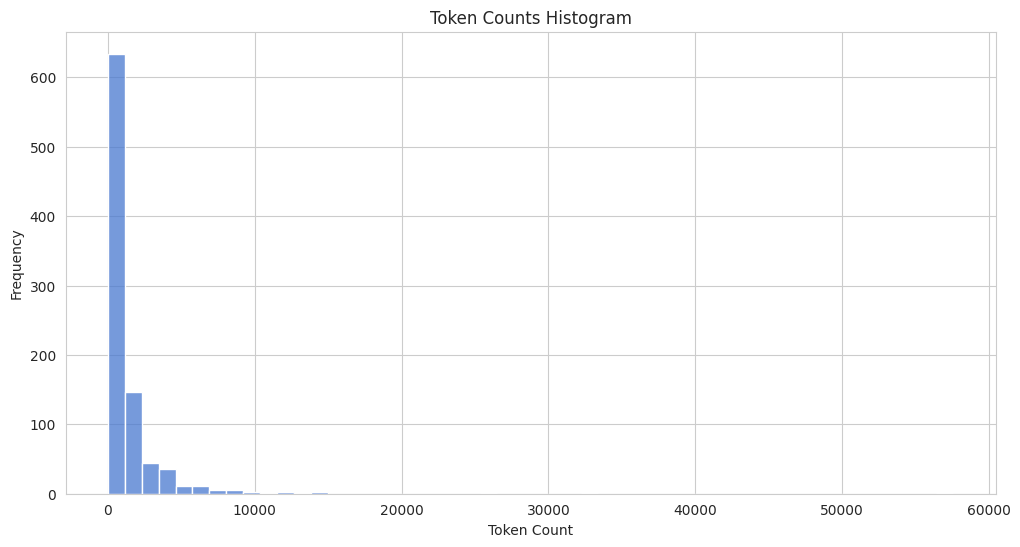

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

The vast majority of pages seem to contain a lower number of tokens. But our limits for the number of tokens to add to each chunk is actually smaller than some of the smaller pages. But, how do we decide what this number should be?

### Chunking the Text

At the time of writing, `gpt-3.5-turbo` supports a context window of 4096 tokens — that means that input tokens + generated ( / completion) output tokens, cannot total more than 4096 without hitting an error.

So we 100% need to keep below this. If we assume a very safe margin of ~2000 tokens for the input prompt into `gpt-3.5-turbo`, leaving ~2000 tokens for conversation history and completion.

With this ~2000 token limit we may want to include *five* snippets of relevant information, meaning each snippet can be no more than **400** token long.

To create these snippets we use the `RecursiveCharacterTextSplitter` from LangChain. To measure the length of snippets we also need a *length function*. This is a function that consumes text, counts the number of tokens within the text (after tokenization using the `gpt-3.5-turbo` tokenizer), and returns that number. We define it like so:

With the length function defined we can initialize our `RecursiveCharacterTextSplitter` object like so:

In [33]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,  # number of tokens overlap between chunks
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

Then we split the text for a document like so:

In [34]:
chunks = text_splitter.split_text(docs[5].page_content)
len(chunks)

2

In [35]:
tiktoken_len(chunks[0]), tiktoken_len(chunks[1])

(390, 60)

For `docs[5]` we created `2` chunks of token length `390` and `60`.

This is for a single document, we need to do this over all of our documents. While we iterate through the docs to create these chunks we will reformat them into a format that looks like:

```json
[
    {
        "id": "abc-0",
        "text": "some important document text",
        "source": "https://langchain.readthedocs.io/en/latest/glossary.html"
    },
    {
        "id": "abc-1",
        "text": "the next chunk of important document text",
        "source": "https://langchain.readthedocs.io/en/latest/glossary.html"
    }
    ...
]
```

The `"id"` will be created based on the URL of the text + it's chunk number.

In [36]:
import hashlib
m = hashlib.md5()  # this will convert URL into unique ID

url = docs[5].metadata['source'].replace('rtdocs/', 'https://')
print(url)

# convert URL to unique ID
m.update(url.encode('utf-8'))
uid = m.hexdigest()[:12]
print(uid)

https://python.langchain.com/en/latest/integrations.html
97ae5cd4ff9d


Then use the `uid` alongside chunk number and actual `url` to create the format needed:

In [37]:
data = [
    {
        'id': f'{uid}-{i}',
        'text': chunk,
        'source': url
    } for i, chunk in enumerate(chunks)
]
data

[{'id': '97ae5cd4ff9d-0',
  'text': '.rst\n.pdf\nIntegrations\n Contents \nIntegrations by Module\nAll Integrations\nIntegrations#\nLangChain integrates with many LLMs, systems, and products.\nIntegrations by Module#\nIntegrations grouped by the core LangChain module they map to:\nLLM Providers\nChat Model Providers\nText Embedding Model Providers\nDocument Loader Integrations\nText Splitter Integrations\nVectorstore Providers\nRetriever Providers\nTool Providers\nToolkit Integrations\nAll Integrations#\nA comprehensive list of LLMs, systems, and products integrated with LangChain:\nAI21 Labs\nAim\nAnalyticDB\nAnyscale\nApify\nAtlasDB\nBanana\nBeam\nCerebriumAI\nChroma\nClearML Integration\nCohere\nComet\nC Transformers\nDataberry\nDatabricks\nDeepInfra\nDeep Lake\nDocugami\nAdvantages vs Other Chunking Techniques\nForefrontAI\nGoogle Search\nGoogle Serper\nGooseAI\nGPT4All\nGraphsignal\nHazy Research\nHelicone\nHugging Face\nJina\nLanceDB\nLlama.cpp\nMetal\nMilvus\nMLflow\nModal\nMome

Now we repeat the same logic across our full dataset:

In [38]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):
    url = doc.metadata['source'].replace('rtdocs/', 'https://')
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)

  0%|          | 0/905 [00:00<?, ?it/s]

4221

We're now left with `4421` documents. We can save them to a JSON lines (`.jsonl`) file like so:

In [39]:
import json

with open('train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

To load the data from file we'd write:

In [ ]:
documents = []

with open('train.jsonl', 'r') as f:
    for line in f:
        documents.append(json.loads(line))

len(documents)

In [ ]:
documents[0]

### (Optional) Sharing the Dataset

We've now created our dataset and you can go ahead and use it in any way you like. However, if you'd like to share the dataset, or store it somewhere that you can get easy access to later — we can use [Hugging Face Datasets Hub](https://huggingface.co/datasets).

To begin we first need to create an account by clicking the **Sign Up** button at [huggingface.co](https://huggingface.co/). Once done we click our profile button in the same location > click **New Dataset** > give it a name like *"langchain-docs"* > set the dataset to **Public** or **Private** > click **Create dataset**.

In [ ]:
!pip install datasets

In [40]:
from datasets import load_dataset

data = load_dataset('addygg/langchain/docs', split = 'train')
data
    #wherever the docs are saved goes in that addyy variable

ModuleNotFoundError: ignored

In [ ]:
data[0]